# Table of Contents
0. [Business Problem](#problem)

1. [Set up the environment](#setup)

2. [Data Preprocessing](#data_preprocessing)
> 2.1. [Import the dataset](#import_data) <br>
> 2.2. [Identify and Handle Missing Data](#missing_data) <br>
> 2.3. [Data Type Validation](#data_validation) <br>
> 2.4. [Exploratory Data Analysis](#data_analysis) <br>
> 2.5. [Feature Scaling](#feature_scaling) <br>

3. [Model Development](#model_development)

> 3.1. [K-means Clustering](#k-means)<br>
>> 1. [Using the elbow method to find the optimal number of clusters](#elbow_method) <br>
>> 1. [Training the K-Means](#train_kmeans) <br>
>> 1. [Visualize K-means Clusters](#visualize_kmeans) <br>

> 3.2. [Hierarchical Clustering](#hierarchical)<br>
>> 1. [Using the dendrogram to find the optimal number of clusters](#dendogram) <br>
>> 1. [Training the Hierarchical clustering](#train_hierarchical) <br>
>> 1. [Visualize K-means Clusters](#visualize_hierarchical) <br>


4. [Conclusion](#conc)

## Business Problem <a id='problem'>
As a supermarket mall owner, you want to segment your customers into discrete groups that share similar characteristics and needs. This will help you identify unsatisfied customer needs and develop uniquely appealing products and services for each segment.
You have some basic data about your customers like Customer ID, age, gender, annual income and spending score. However, you don't know how to use this data to create meaningful customer segments that can inform your marketing strategy. You need a method to analyze the data and cluster the customers based on their similarities and differences.

## Setup the environment <a id='setup'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing <a id='data_preprocessing'>

### Import the dataset <a id='import_data'>

In [2]:
dataset = pd.read_csv('./data/segmentation data.csv')

In [3]:
dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
# drop the id column 
dataset.drop(columns=['ID'], inplace=True)

In [5]:
dataset.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


### Identify and handle the missing data <a id='missing_data'>

In [6]:
dataset.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

### Data type validation <a id='data_validation'>

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


We can notice that the dataset is already cleaned and transformed into numerical data so it's ready to work with

### Exploratory Data Analysis <a id='data_analysis'>

We will start with quick summary on the dataset using `describe()` methos

In [8]:
dataset.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Text(0.5, 1.0, 'Male vs Female Count')

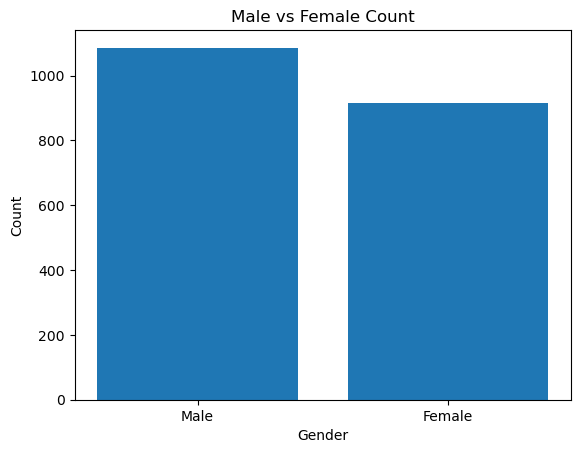

In [9]:
# SEX
labels = ['Male' if g==0 else 'Female' for g in dataset['Sex']]

count_male = labels.count('Male')
count_female = labels.count('Female')
counts = [count_male, count_female]

# Create a bar plot
plt.bar(['Male', 'Female'], counts)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Male vs Female Count')

Text(0.5, 1.0, 'Single vs Non-Single Count')

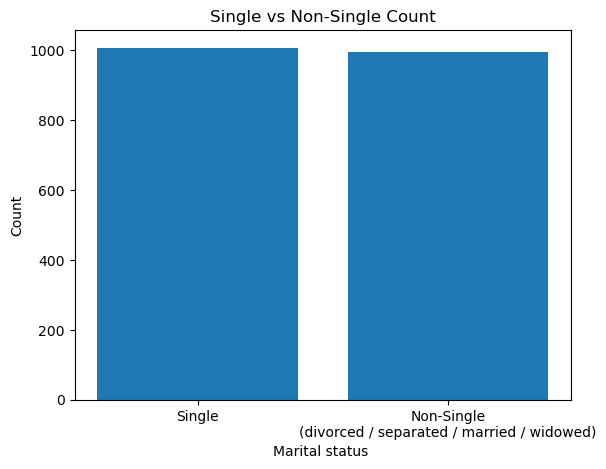

In [10]:
# Marital Status
labels = ['Single' if s==0 else 'Non-Single' for s in dataset['Marital status']]

count_single = labels.count('Single')
count_non_single = labels.count('Non-Single')
counts = [count_single, count_non_single]

# Create a bar plot
plt.bar(['Single', 'Non-Single\n(divorced / separated / married / widowed)'], counts)

# Add labels and title
plt.xlabel('Marital status ')
plt.ylabel('Count')
plt.title('Single vs Non-Single Count')

Text(0.5, 1.0, "Distribution of customer's Age")

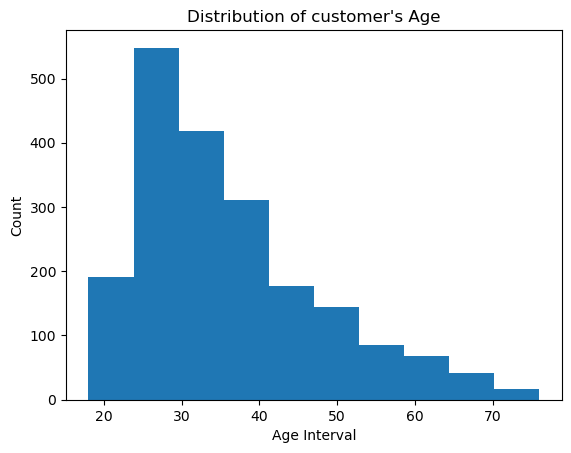

In [11]:
# AGE
plt.hist(dataset['Age'])

# Add labels and title
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.title('Distribution of customer\'s Age')

Text(0.5, 1.0, 'Education Level Distribution')

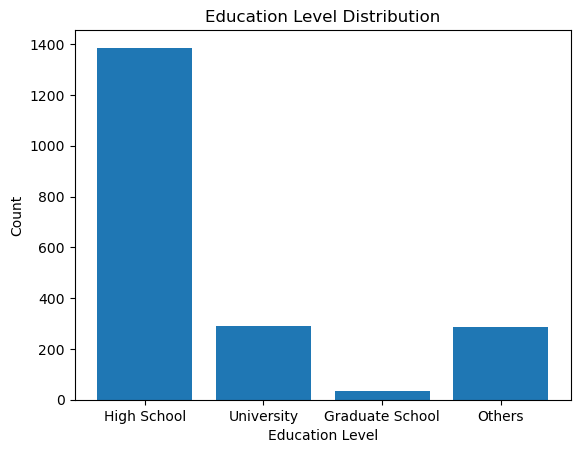

In [12]:
# Education
labels = ['Others' if e==0 else ('High school' if e==1 else ('University' if e==2 else 'Graduate school')) for e in dataset['Education']]

count_others = labels.count('Others')
count_high_school = labels.count('High school')
count_university = labels.count('University')
count_grad = labels.count('Graduate school')

counts = [count_high_school, count_university, count_grad, count_others]

# Create a bar plot
plt.bar(['High School', 'University', 'Graduate School', 'Others'], counts)

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')

Text(0.5, 1.0, "Distribution of customer's Income")

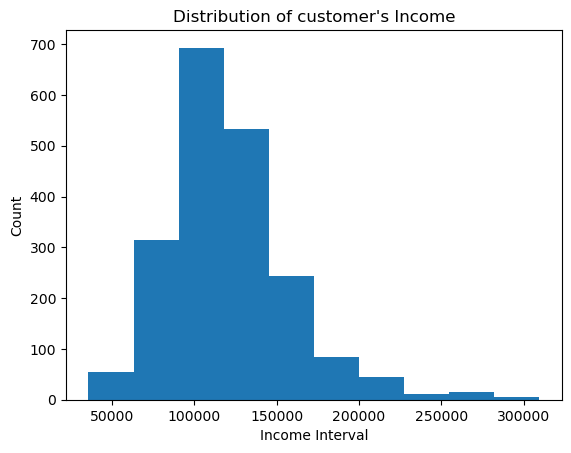

In [13]:
# Income
plt.hist(dataset['Income'])

# Add labels and title
plt.xlabel('Income Interval')
plt.ylabel('Count')
plt.title('Distribution of customer\'s Income')

Text(0.5, 1.0, 'Occupation Level Distribution')

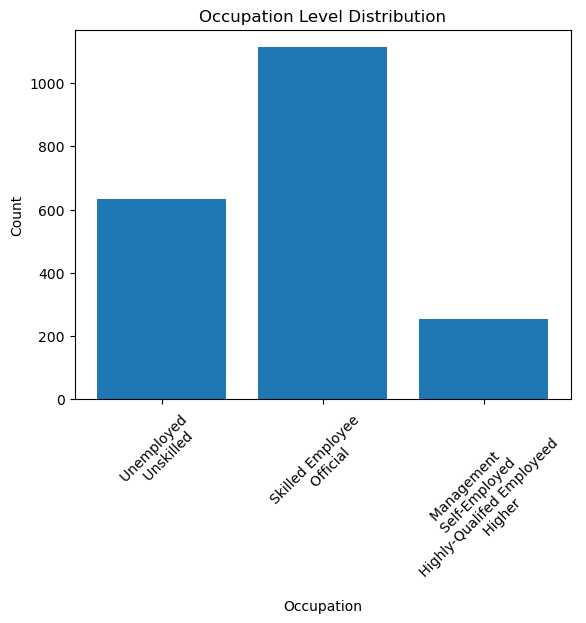

In [14]:
# Occupation
labels = ['unemployed' if o==0 else ('skilled' if o==1 else 'higher') for o in dataset['Occupation']]

count_unemployed = labels.count('unemployed')
count_skilled = labels.count('skilled')
count_higher = labels.count('higher')


counts = [count_unemployed, count_skilled, count_higher]

# Create a bar plot
plt.bar(['Unemployed \n Unskilled', 'Skilled Employee \n Official', 'Management \n Self-Employed \n Highly-Qualifed Employeed \n Higher'], counts)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Level Distribution')


We can conclude that:

    1. There's no big difference in Gender / Marital Status counts.
    
    2. The majority of customers ages inbetween 25 - 40
    
    3. Most of customers has High school certicate as highest level of Education which can explain also alot of them are officials


## Feature Scaling <a id='feature_scaling'>
For the sake of practice we will choose `Age` and `Income` as they are the most likely to affect our clusters
This is because we want to visualize our clusters in 2D graph

In [15]:
X = dataset[['Age', 'Income']].values
X

array([[    67, 124670],
       [    22, 150773],
       [    49,  89210],
       ...,
       [    31,  86400],
       [    24,  97968],
       [    25,  68416]])

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X= sc.fit_transform(X)
X

array([[ 2.65361447,  0.09752361],
       [-1.18713209,  0.78265438],
       [ 1.11731585, -0.83320224],
       ...,
       [-0.41898277, -0.90695688],
       [-1.01643224, -0.60332923],
       [-0.93108232, -1.3789866 ]])

## Model Development  <a id='model_development'>

We will try two models and compare between them the first one is 
1. K-means
2. Hierarchical clustering

We will start by visualizing our dataset given the age and income features

Text(0.5, 1.0, 'Age Vs. Income Distribution')

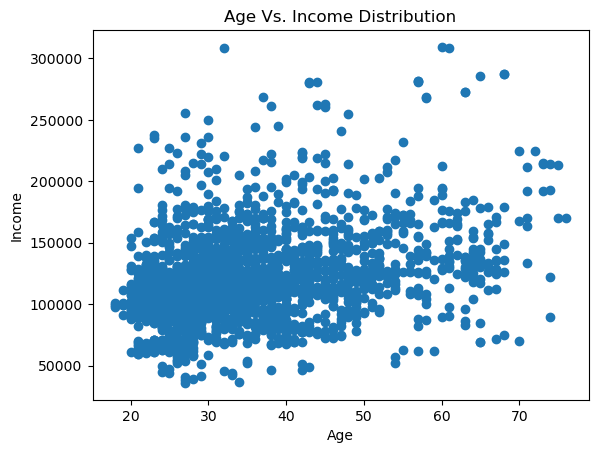

In [17]:
plt.scatter(x=dataset['Age'], y=dataset['Income'])

plt.xlabel("Age")
plt.ylabel('Income')
plt.title('Age Vs. Income Distribution')

### K-means Clustering <a id='k-means'>
K-means clustering is a technique for finding groups of similar data points in a dataset. It works by partitioning the data into a predefined number of clusters, each with a center called a centroid. The algorithm assigns each data point to the cluster whose centroid is closest to it, and then updates the centroids based on the new assignments. This process is repeated until the clusters do not change significantly.

K-means clustering has some advantages and disadvantages. Some of the advantages are:

- It is simple and easy to implement.
- It can handle large datasets efficiently.
- It can produce compact and spherical clusters.

Some of the disadvantages are:

- It requires the number of clusters to be specified in advance, which may not be easy to determine.
- It is sensitive to outliers and noise, which can affect the cluster quality.
- It can get stuck in local optima, depending on the initial centroids.

K-means clustering can be used for various applications, such as:

- Market segmentation: to identify groups of customers with similar preferences or behaviors.
- Image segmentation: to group pixels with similar colors or features.
- Document clustering: to group documents with similar topics or keywords.

### Using the elbow method to find the optimal number of clusters <a id='elbow_method'>

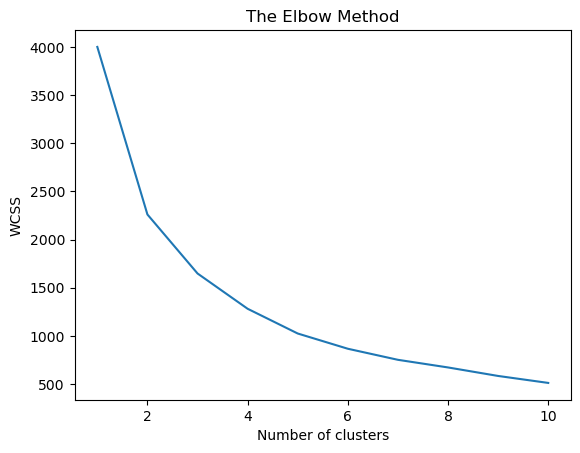

In [18]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means model on the dataset  <a id='train_kmeans'>

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

### Visualising the clusters <a id='visualize_kmeans'>

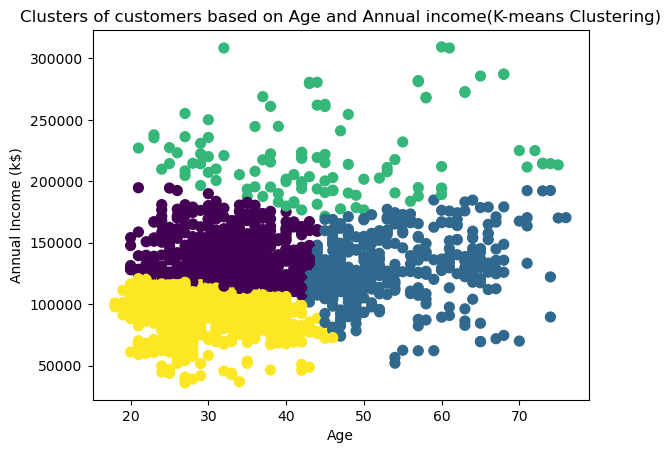

In [20]:
plt.scatter(dataset['Age'], dataset['Income'], c=labels, s=50)

plt.title('Clusters of customers based on Age and Annual income(K-means Clustering)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

plt.savefig('kmeans_results')

### Hierarchical clustering <a id='hierarchial'>
- Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters based on the dissimilarity between data points. 
- It can be either `agglomerative`, which is a bottom-up approach that starts with each data point as its own cluster and merges them until one cluster is left.
- Or `divisive`, which is a top-down approach that starts with all data points in one cluster and splits them until each cluster contains one data point.
- Hierarchical clustering can use any valid measure of distance, such as Euclidean distance, and any linkage criterion, such as Ward linkage, which minimizes the variance between clusters.
- Hierarchical clustering can be used on any data to visualize and interpret the relationship between individual data points, and it is often presented in a dendrogram.

Hierarchical clustering has some advantages and disadvantages. Some of the advantages are:
- Some advantages of hierarchical clustering are that it does not require specifying the number of clusters beforehand, it can handle any shape of clusters, and it is easy to interpret.

Some of the disadvantages are:
- Some disadvantages are that it is computationally expensive, it is sensitive to outliers and noise, and it does not allow reassigning data points to different clusters once they are merged or split.

Hierarchical clustering can be used for various applications, such as:
- Some use cases of hierarchical clustering are document clustering, image segmentation, social network analysis, and customer segmentation.

### Using the dendrogram to find the optimal number of clusters <a id='dendrogram'>

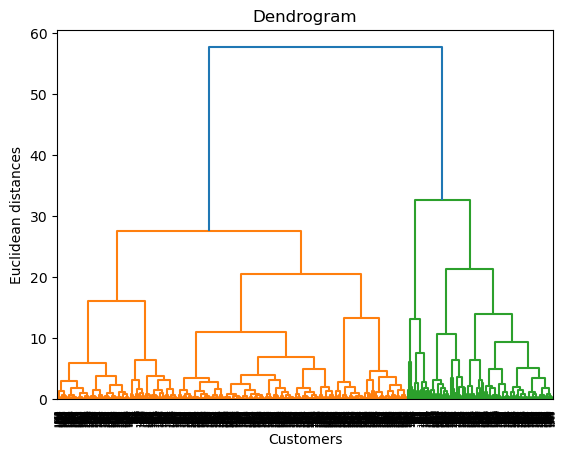

In [21]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Training the Hierarchical Clustering model on the dataset <a id='train_hierarchical'>

In [22]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
hc.fit(X)
labels = hc.labels_

### Visualising the clusters <a id='visualize_hierarchical'>

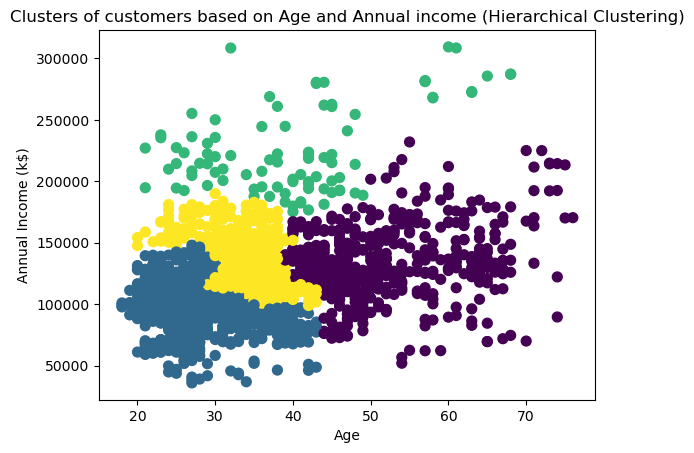

In [23]:
plt.scatter(dataset['Age'], dataset['Income'], c=labels, s=50)

plt.title('Clusters of customers based on Age and Annual income (Hierarchical Clustering)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

plt.savefig('hierarchical_results.png')

## Conclusion <a id='conclusion'>
- The two models we used (K-means , Hierarchical clustering) to segment the customers showed similar results, with only minor differences in some clusters.

- To evaluate which model is more suitable for our marketing strategy, we need to consider other factors, such as the business objectives, the customer feedback, and the expected return on investment.

- We also need to be aware of the ethical issues in marketing, such as false advertising, selective marketing, and misuse of customer data  .

- We should not target customers based on their income or age, or use heavy ads that might mislead or manipulate them. We should respect their privacy and preferences, and offer them value and quality.

- Ethical marketing can help us build trust and loyalty with our customers, and avoid legal troubles and reputation damage .
